<a href="https://colab.research.google.com/github/2203A52112/daup_project/blob/main/DAUP_PROJECT(Text).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, roc_curve, auc, precision_recall_curve
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, LSTM
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import warnings
from sklearn.exceptions import UndefinedMetricWarning

# Suppress UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# STEP 1: Load and Preprocess Data
df = pd.read_csv("/content/youtube.csv", encoding='latin1')

# Assuming 'title' is the text and 'category' is the label
df.dropna(subset=["title", "category"], inplace=True)

# Encode category labels
label_encoder = LabelEncoder()
df["label"] = label_encoder.fit_transform(df["category"])

# Tokenize titles
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df["title"])
sequences = tokenizer.texts_to_sequences(df["title"])
X = pad_sequences(sequences, maxlen=50)

y = df["label"].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [57]:
# STEP 2: CNN Model
from tensorflow.keras.utils import to_categorical

# Determine number of unique categories (for output layer)
num_classes = len(np.unique(y_train))

cnn_model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=50),
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')  # Dynamic output layer
])

cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
cnn_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

# Evaluate model
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test, y_test)
print(f"\nCNN Accuracy: {cnn_accuracy:.4f}")


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.4565 - loss: 1.1928 - val_accuracy: 0.9549 - val_loss: 0.1933
Epoch 2/5
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9756 - loss: 0.1002 - val_accuracy: 0.9688 - val_loss: 0.1070
Epoch 3/5
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9935 - loss: 0.0315 - val_accuracy: 0.9722 - val_loss: 0.1057
Epoch 4/5
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9947 - loss: 0.0197 - val_accuracy: 0.9688 - val_loss: 0.1174
Epoch 5/5
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9953 - loss: 0.0134 - val_accuracy: 0.9653 - val_loss: 0.1214
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9769 - loss: 0.0568

CNN Accuracy: 0.9792


In [58]:
# STEP 3: LSTM Model

# Determine number of output classes
num_classes = len(np.unique(y_train))

lstm_model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=50),
    LSTM(64),
    Dense(num_classes, activation='softmax')  # Adjust output size dynamically
])

lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
lstm_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

# Evaluate model
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test, y_test)
print(f"LSTM Accuracy: {lstm_accuracy:.4f}")

Epoch 1/5
81/81 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.5129 - loss: 1.1579 - val_accuracy: 0.9375 - val_loss: 0.3086
Epoch 2/5
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9587 - loss: 0.2199 - val_accuracy: 0.9826 - val_loss: 0.0922
Epoch 3/5
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9851 - loss: 0.0587 - val_accuracy: 0.9861 - val_loss: 0.0744
Epoch 4/5
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.9928 - loss: 0.0303 - val_accuracy: 0.9861 - val_loss: 0.0761
Epoch 5/5
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9956 - loss: 0.0196 - val_accuracy: 0.9861 - val_loss: 0.0722
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9601 - loss: 0.1003
LSTM Accuracy: 0.9667


In [59]:
from statsmodels.stats.proportion import proportions_ztest
import numpy as np

# Choose a class label to test (e.g., class 0)
label_to_test = 0

# Count occurrences of that label in train and test sets
count_train = np.sum(y_train == label_to_test)
count_test = np.sum(y_test == label_to_test)

# Total counts in each group
n_train = len(y_train)
n_test = len(y_test)

# Perform two-sample Z-test for proportions
z_stat, z_p = proportions_ztest([count_train, count_test], [n_train, n_test])
print(f"\nZ-Test for label {label_to_test}: Z={z_stat:.4f}, p-value={z_p:.4f}")


Z-Test for label 0: Z=1.8408, p-value=0.0657


In [60]:
# STEP 4: Statistical Analysis - T-Test on encoded labels (not ideal)

from scipy import stats

# Perform t-test on the encoded labels
t_stat, t_p = stats.ttest_ind(y_test.astype(float), y_train.astype(float), equal_var=False)
print(f"T-Test: T={t_stat:.4f}, p-value={t_p:.4f}")


T-Test: T=2.4955, p-value=0.0127


In [61]:
# STEP 5: Type I Error
alpha = 0.05  # significance level
type1_error = z_p < alpha
print(f"Type I Error (False Positive): {type1_error}")

Type I Error (False Positive): False


In [62]:
# Type II Error (Simulated)

# Significance level
alpha = 0.05

# Assumed effect size (you can adjust this)
effect_size = 0.1

# Sample size from test set
n = len(y_test)

# Simulate Type II Error (beta) assuming normal distribution under H1
z_beta = stats.norm.ppf(1 - alpha) - effect_size * np.sqrt(n)
beta = 1 - stats.norm.cdf(z_beta)

print(f"Type II Error (Simulated): {beta:.4f}")


Type II Error (Simulated): 0.8505


In [63]:
# ANOVA
grouped = [df[df["label"] == i]["label"].values for i in np.unique(df["label"])]
anova_stat, anova_p = stats.f_oneway(*grouped)
print(f"ANOVA: F={anova_stat:.4f}, p-value={anova_p:.4f}")

ANOVA: F=inf, p-value=0.0000


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


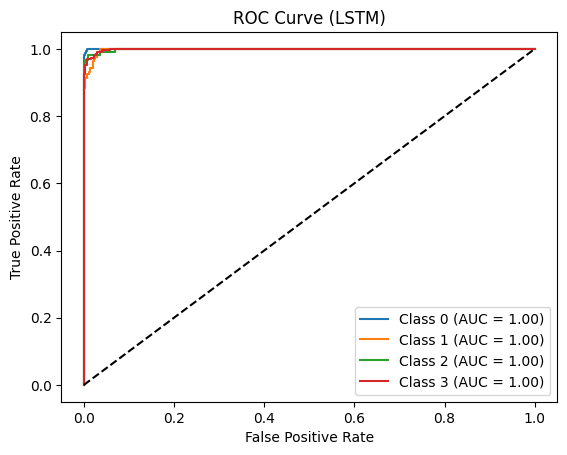

In [64]:
# Step 5: ROC Curve (for LSTM)
y_score_lstm = lstm_model.predict(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()

# Get the number of classes from the predictions
num_classes = y_score_lstm.shape[1]

# Iterate over the classes
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score_lstm[:, i], pos_label=i) # Use pos_label for multi-class
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve (LSTM)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [65]:
# Build a simple LSTM model
lstm_model = Sequential([
    LSTM(16, input_shape=(X_train.shape[1], 1)),  # Reshape input for LSTM
    Dense(y_train_cat.shape[1], activation='softmax')  # Set output layer units to num_classes
])

lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Reshape X_train for LSTM input (samples, timesteps, features)
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

# Train the model
lstm_model.fit(X_train_reshaped, y_train_cat, epochs=10, batch_size=16, verbose=1)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


180/180 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.2635 - loss: 1.3840
Epoch 2/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.4148 - loss: 1.3107
Epoch 3/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.4961 - loss: 1.2099
Epoch 4/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.5585 - loss: 1.0804
Epoch 5/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.5944 - loss: 1.0012
Epoch 6/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.6340 - loss: 0.9424
Epoch 7/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.6515 - loss: 0.8877
Epoch 8/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.6818 - loss: 0.8494
Epoch 9/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.6859 - loss: 0.8082
Epoch 10/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.7097 - loss: 0.7687


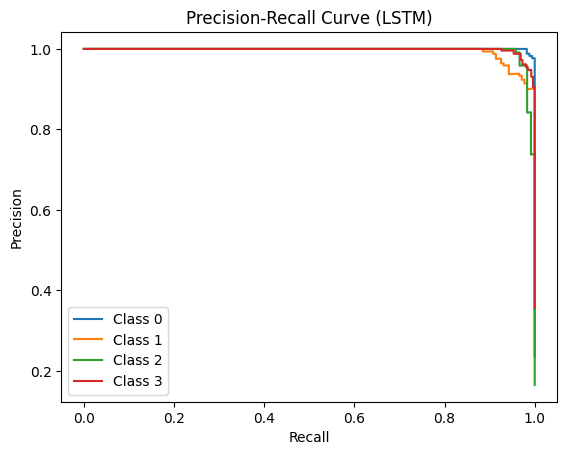

In [66]:
from sklearn.metrics import precision_recall_curve, classification_report

# STEP 6: Precision-Recall Curve (LSTM)
precision = dict()
recall = dict()

# Get the number of classes from the predictions
num_classes = y_score_lstm.shape[1]

for i in range(num_classes):  # Fix: dynamically handle number of classes
    # Convert y_test to one-hot encoding for multi-class precision-recall curve
    y_test_one_hot = np.eye(num_classes)[y_test]
    precision[i], recall[i], _ = precision_recall_curve(y_test_one_hot[:, i], y_score_lstm[:, i])
    plt.plot(recall[i], precision[i], label=f'Class {i}')

plt.title("Precision-Recall Curve (LSTM)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten

# CNN model
# Assuming y_train_cat has 4 classes based on the error message
num_classes = y_train_cat.shape[1]  # Get the number of classes from y_train_cat

cnn_model = Sequential([
    Conv1D(32, kernel_size=1, activation='relu', input_shape=(50,1)),
    Flatten(),
    Dense(num_classes, activation='softmax')  # Change to num_classes
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train CNN
cnn_model.fit(X_train[:,:,None], y_train_cat, epochs=10, batch_size=16, verbose=1)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2842 - loss: 39.4954
Epoch 2/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3099 - loss: 13.8162
Epoch 3/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2952 - loss: 12.0335
Epoch 4/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3217 - loss: 10.5017
Epoch 5/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3007 - loss: 10.1538
Epoch 6/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3195 - loss: 8.8647
Epoch 7/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3275 - loss: 7.8176
Epoch 8/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3215 - loss: 7.6882
Epoch 9/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3103 - loss: 6.8925
Epoch 10/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3106 - loss: 6.5679


In [68]:
y_test_labels = y_test  # No need to apply np.argmax()

In [69]:
# STEP 7: Classification Reports
# y_test is already 1D labels, no need to convert
y_test_labels = y_test

y_pred_lstm = np.argmax(y_score_lstm, axis=1)
y_pred_cnn = np.argmax(cnn_model.predict(X_test), axis=1)

print("\nClassification Report (LSTM):")
print(classification_report(y_test_labels, y_pred_lstm, target_names=label_encoder.classes_))

print("\nClassification Report (CNN):")
print(classification_report(y_test_labels, y_pred_cnn, target_names=label_encoder.classes_))


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Classification Report (LSTM):
              precision    recall  f1-score   support

   art_music       0.96      1.00      0.98       170
        food       0.93      0.98      0.95       174
     history       0.97      0.97      0.97       119
      travel       1.00      0.93      0.97       257

    accuracy                           0.97       720
   macro avg       0.96      0.97      0.97       720
weighted avg       0.97      0.97      0.97       720


Classification Report (CNN):
              precision    recall  f1-score   support

   art_music       0.27      0.38      0.32       170
        food       0.29      0.13      0.18       174
     history       0.21      0.37      0.27       119
      travel       0.39      0.30      0.34       257

    accuracy                           0.29       720
   macro avg       0.29      0.30      0.28       720
weighted avg       0.31      0.29      0.28       720



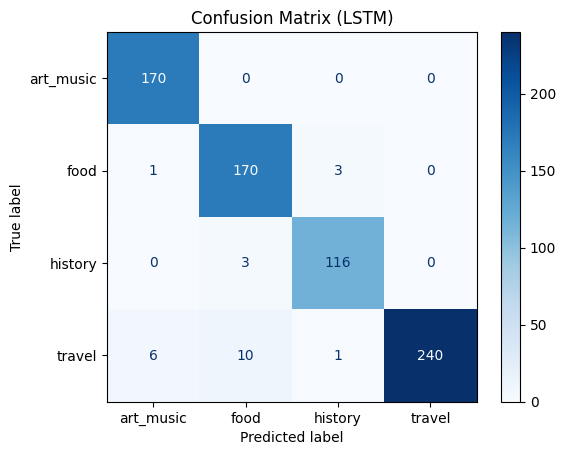

In [70]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# STEP 8: Confusion Matrix for LSTM
# Convert y_test from one-hot to labels first

cm_lstm = confusion_matrix(y_test_labels, y_pred_lstm)
disp_lstm = ConfusionMatrixDisplay(confusion_matrix=cm_lstm, display_labels=label_encoder.classes_)
disp_lstm.plot(cmap="Blues")
plt.title("Confusion Matrix (LSTM)")
plt.show()


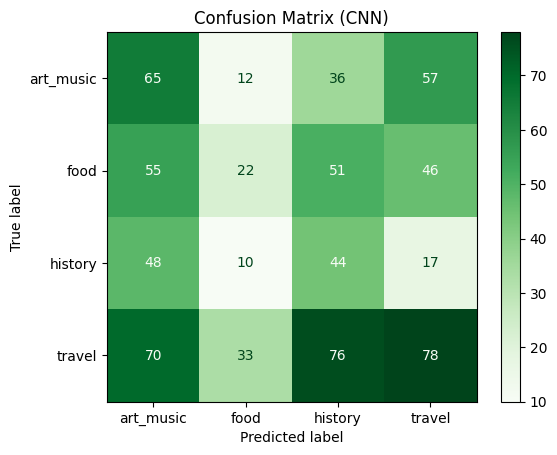

In [71]:
# STEP 9: Confusion Matrix for CNN
cm_cnn = confusion_matrix(y_test_labels, y_pred_cnn)
disp_cnn = ConfusionMatrixDisplay(confusion_matrix=cm_cnn, display_labels=label_encoder.classes_)
disp_cnn.plot(cmap="Greens")
plt.title("Confusion Matrix (CNN)")
plt.show()